In [1]:
# showing plots for data from 2/21/25
# the sweeping data was collected with 1 source meter, collecting I_DS and I_GS
# this data was DMF-based functionalization on b2d7, b2d8
# the time series data was done only using 1 channel
# also multiple concentrations of PBS were used to find the transc point:
#      0.001, 0.01, 0.1, 1, 10 X PBS
# the timeseries was done with 0.001X and 0.1X PBS

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [19]:
# filenames

# filenames for functionalization
filenames_7a_func = ['data/data_2-21-25/b2d7a-id.csv', 
                 'data/data_2-21-25/b2d7a-pbase.csv', 
                 'data/data_2-21-25/b2d7a-ab.csv',
                 'data/data_2-21-25/b2d7a-peg.csv',
                 'data/data_2-21-25/b2d7a-eta.csv',]

filenames_7b_func = ['data/data_2-21-25/b2d7b-id.csv', 
                 'data/data_2-21-25/b2d7b-pbase(blank).csv', 
                 'data/data_2-21-25/b2d7b-ab(blank).csv',
                 'data/data_2-21-25/b2d7b-peg(blank).csv',
                 'data/data_2-21-25/b2d7b-eta(blank).csv',]

filenames_8a_func = ['data/data_2-21-25/b2d8a-id.csv', 
                 'data/data_2-21-25/b2d8a-pbase.csv', 
                 'data/data_2-21-25/b2d8a-ab.csv',
                 'data/data_2-21-25/b2d8a-peg.csv',
                 'data/data_2-21-25/b2d8a-eta.csv',]

filenames_8b_func = ['data/data_2-21-25/b2d8b-id.csv', 
                 'data/data_2-21-25/b2d8b-pbase(blank).csv', 
                 'data/data_2-21-25/b2d8b-ab(blank).csv',
                 'data/data_2-21-25/b2d8b-peg(blank).csv',
                 'data/data_2-21-25/b2d8b-eta(blank).csv',]



# filenames for concentrations of PBS
filenames_7a_pbs = ['data/data_2-21-25/b2d7a-p001x.csv', 
                 'data/data_2-21-25/b2d7a-p01x.csv', 
                 'data/data_2-21-25/b2d7a-p1x.csv',
                 'data/data_2-21-25/b2d7a-eta.csv',
                 'data/data_2-21-25/b2d7a-10x.csv',]

filenames_7b_pbs = ['data/data_2-21-25/b2d7b-p001x(blank).csv', 
                 'data/data_2-21-25/b2d7b-p01x(blank).csv', 
                 'data/data_2-21-25/b2d7b-p1x(blank).csv',
                 'data/data_2-21-25/b2d7b-eta(blank).csv',
                 'data/data_2-21-25/b2d7b-10x(blank).csv',]

filenames_8a_pbs = ['data/data_2-21-25/b2d8a-p001x.csv', 
                 'data/data_2-21-25/b2d8a-p01x.csv', 
                 'data/data_2-21-25/b2d8a-p1x.csv',
                 'data/data_2-21-25/b2d8a-eta.csv',
                 'data/data_2-21-25/b2d8a-10x.csv',]

filenames_8b_pbs = ['data/data_2-21-25/b2d8b-p001x(blank).csv', 
                 'data/data_2-21-25/b2d8b-p01x(blank).csv', 
                 'data/data_2-21-25/b2d8b-p1x(blank).csv',
                 'data/data_2-21-25/b2d8b-eta(blank).csv',
                 'data/data_2-21-25/b2d8b-10x(blank).csv',]

In [8]:
def load_csv_data_1ch(filenames):
    '''
    for multiple file
    6, 4
    '''
    data_list = []
    for filename in filenames:
        data_device = np.genfromtxt(filename, delimiter=',', skip_header=1, filling_values=np.nan).T[[6, 4], :]
        data_device = np.nan_to_num(data_device)
        data_list.append(data_device)
    data = np.array(data_list)
    data[:, 1, :] *= 1000.0
    return data[:,:,-200:][:, :, ::-1] # (num_device, (voltages/currents), voltage_sweep)

def get_dirac_points(IV_mx):
    dirac_idx = np.argmin(IV_mx[:,1,:], axis=-1)
    dirac_ivs = np.array([IV_mx[idx,:,dirac_idx[idx]] for idx in range(len(dirac_idx))])
    return dirac_ivs

In [20]:
data_b2d7a_func = load_csv_data_1ch(filenames_7a_func)
data_b2d7a_dirac = get_dirac_points(data_b2d7a_func)

data_b2d7b_func = load_csv_data_1ch(filenames_7b_func)
data_b2d7b_dirac = get_dirac_points(data_b2d2b_func)

data_b2d8a_func = load_csv_data_1ch(filenames_8a_func)
data_b2d8a_dirac = get_dirac_points(data_b2d8a_func)

data_b2d8b_func = load_csv_data_1ch(filenames_8b_func)
data_b2d8b_dirac = get_dirac_points(data_b2d8b_func)

print(data_b2d2d_func.shape)
print(data_b2d2d_dirac.shape)
print('---')

data_b2d7a_pbs = load_csv_data_1ch(filenames_7a_pbs)
data_b2d7a_dirac_pbs = get_dirac_points(data_b2d7a_pbs)

data_b2d7b_pbs = load_csv_data_1ch(filenames_7b_pbs)
data_b2d7b_dirac_pbs = get_dirac_points(data_b2d7b_pbs)

data_b2d8a_pbs = load_csv_data_1ch(filenames_8a_pbs)
data_b2d8a_dirac_pbs = get_dirac_points(data_b2d8a_pbs)

data_b2d8b_pbs = load_csv_data_1ch(filenames_8b_pbs)
data_b2d8b_dirac_pbs = get_dirac_points(data_b2d8b_pbs)
print(data_b2d7a_pbs.shape)
print(data_b2d7a_dirac_pbs.shape)

(5, 2, 200)
(5, 2)
---
(5, 2, 200)
(5, 2)


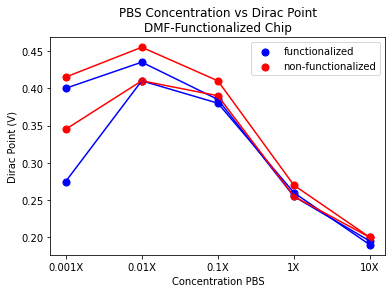

In [37]:
def plot_pbs_dirac(dirac_mx_pbs_list, dirac_mx_pbs_blank_list, title):
    xlabels = ['0.001X', '0.01X', '0.1X', '1X', '10X']
    colors = ['red', 'blue']
    labels = ['functionalized', 'non-functionalized']
    colors = ['blue', 'red']
    
    for dev_num in range(len(dirac_mx_pbs_list)):
        plt.scatter(range(dirac_mx_pbs_list[dev_num][:,0].size), dirac_mx_pbs_list[dev_num][:,0], s=50, color=colors[0], label=labels[0])
        plt.plot(range(dirac_mx_pbs_list[dev_num][:,0].size), dirac_mx_pbs_list[dev_num][:,0], color=colors[0], label=labels[0])

        plt.scatter(range(dirac_mx_pbs_blank_list[dev_num][:,0].size), dirac_mx_pbs_blank_list[dev_num][:,0], s=50, color=colors[1], label=labels[1])
        plt.plot(range(dirac_mx_pbs_blank_list[dev_num][:,0].size), dirac_mx_pbs_blank_list[dev_num][:,0], color=colors[1], label=labels[1])

    handles, labels = plt.gca().get_legend_handles_labels()
    unique = {}
    for handle, label in zip(handles, labels):
        if label not in unique:
            unique[label] = handle
    sorted_unique = dict(sorted(unique.items(), key=lambda x: x[0]))
    plt.legend(sorted_unique.values(), sorted_unique.keys())

    plt.xlabel('Concentration PBS')
    plt.ylabel('Dirac Point (V)')
    plt.title(title)
    plt.xticks(range(len(xlabels)), xlabels)
    plt.show()
    plt.close()


plot_pbs_dirac([data_b2d7a_dirac_pbs, data_b2d8a_dirac_pbs], [data_b2d7b_dirac_pbs, data_b2d8b_dirac_pbs], 'PBS Concentration vs Dirac Point\nDMF-Functionalized Chip')

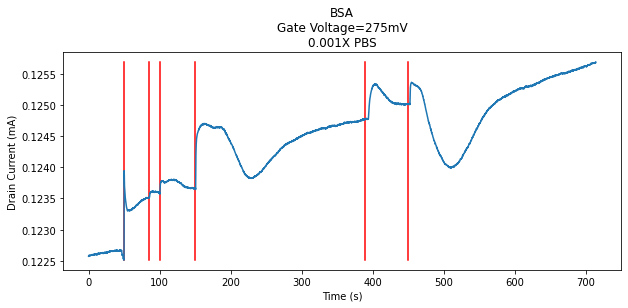

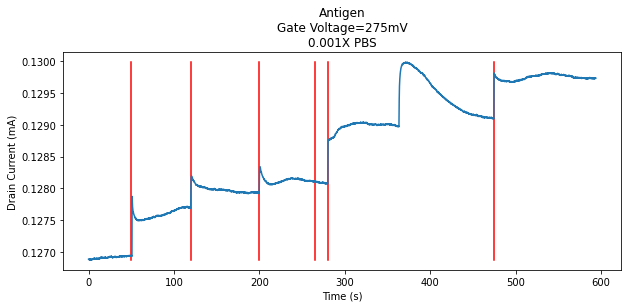

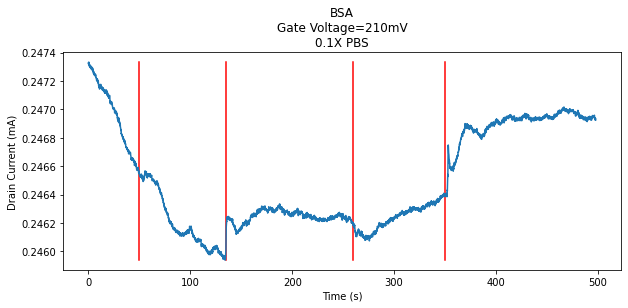

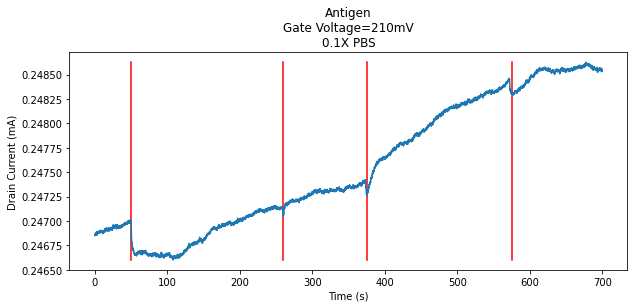

In [42]:
def plot_time_series_1ch(file_path, max_time_sample, xval_action_list, title):
    data_timesweep = np.genfromtxt(file_path, delimiter=",", dtype=np.float64, filling_values=np.nan)
    data_timesweep = data_timesweep[1:max_time_sample,[4,3]].T
    
    data_timesweep[1,:] *= 1000.0
    
    plt.figure(figsize=(10, 4))
    
    minim = np.min(data_timesweep[1])
    maxim = np.max(data_timesweep[1])
    for xval in xval_action_list:
        plt.plot([xval, xval], [minim, maxim], color='r')
    
    plt.plot(data_timesweep[0], data_timesweep[1])
    plt.xlabel('Time (s)')
    plt.ylabel('Drain Current (mA)')
    plt.title(title)
    plt.show()
    plt.close()


file_path = 'data/data_2-21-25/b2d7a-p001x-bsa-timeseries.csv'
max_time_sample = 7146
xval_action_list = [50, 85, 100, 150, 390, 450]
title = 'BSA\nGate Voltage=275mV\n0.001X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)

file_path = 'data/data_2-21-25/b2d7a-p001x-antigen-timeseries.csv'
max_time_sample = 5941
xval_action_list = [50, 120, 200, 280, 265, 475]
title = 'Antigen\nGate Voltage=275mV\n0.001X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)

file_path = 'data/data_2-21-25/b2d8a-p1x-bsa-timesweep.csv'
max_time_sample = 4980
xval_action_list = [50, 135, 260, 350]
title = 'BSA\nGate Voltage=210mV\n0.1X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)

file_path = 'data/data_2-21-25/b2d8a-p1x-antigen-timesweep.csv'
max_time_sample = 7000# 7689
xval_action_list = [50, 260, 375, 575]
title = 'Antigen\nGate Voltage=210mV\n0.1X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)
